# NNSAE on FashionMNIST Dataset
Online learning and generalization of parts-based image representations by Non-Negative Sparse Autoencoders from Lemme et al. (2011).
* Dimension of the encoding : 100
* Shallow Encoder and Decoder with tied weights $W_E = W_D^T$ 
* Sparsity of the encoding enforced with Intrinsic Plasticity:
    * Learning rate for synaptic plasticity of the read-out layer : lrateRO = 0.01
    * Learning rate for intrinsic plasticity : lrateIP = 0.001
* Non-Negativity of the weigths enforced with asymetric weight decay (no decay on positive weights) 
* In the original paper, the data is scaled by multiplying it by 0.25, but MNIST was between 0 and 255 while FashionMNIST is already between 0 and 1. This notbook shows both with and without scaling, note that it does not change the visual quality of the reconstruction and the max_approximation. Note as well that is does no affect the measured sparsity of the encoding.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import datetime
import morphoMaths
import pandas as pd
from scipy import io
import metrics

Using TensorFlow backend.


In [2]:
def plot_histograms(H):
    nb_samples, nb_features = H.shape
    plt.figure(figsize=(3*nb_samples, 4))
    for i in range(nb_samples):
        ax = plt.subplot(1, nb_samples, i + 1)
        ax.hist(H[i], bins=nb_features)
    plt.show()    

## 1. Without scaling

In [3]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=False, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2]=31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [4]:
h_test = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/x_test_rec.mat")['x_test_rec']
atoms = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/W.mat")['W']

In [5]:
x_rec_test = x_rec_test.reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))

In [6]:
x_rec_small = x_rec_test[idx_small]

In [7]:
def plot_histograms(H):
    nb_samples, nb_features = H.shape
    plt.figure(figsize=(3*nb_samples, 4))
    for i in range(nb_samples):
        ax = plt.subplot(1, nb_samples, i + 1)
        ax.hist(H[i], bins=nb_features)
    plt.show()    

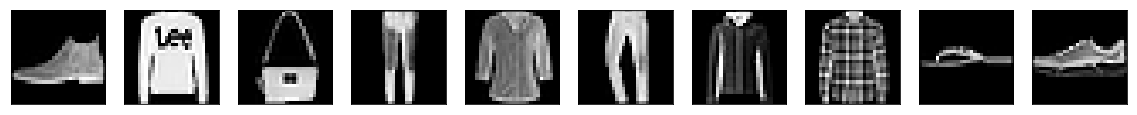

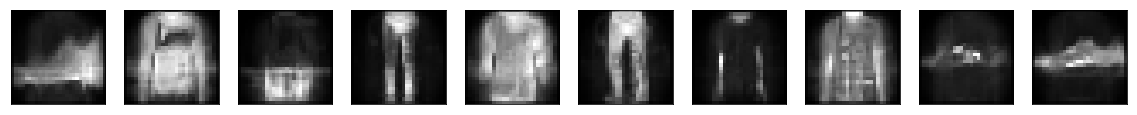

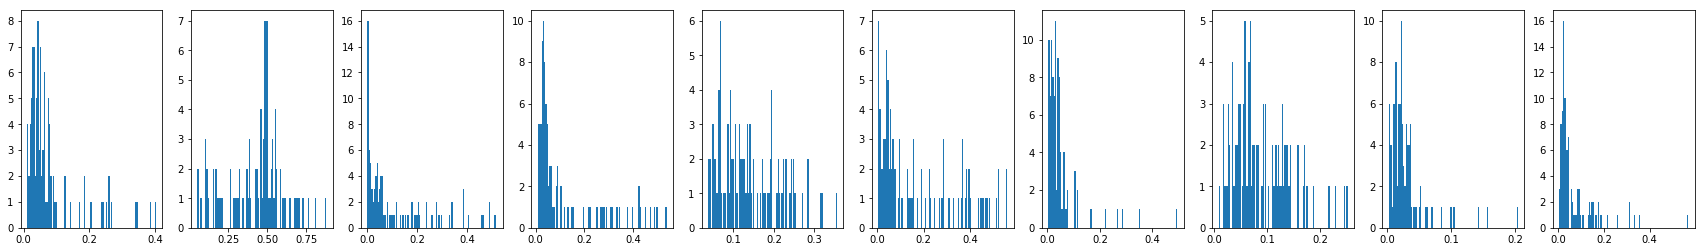

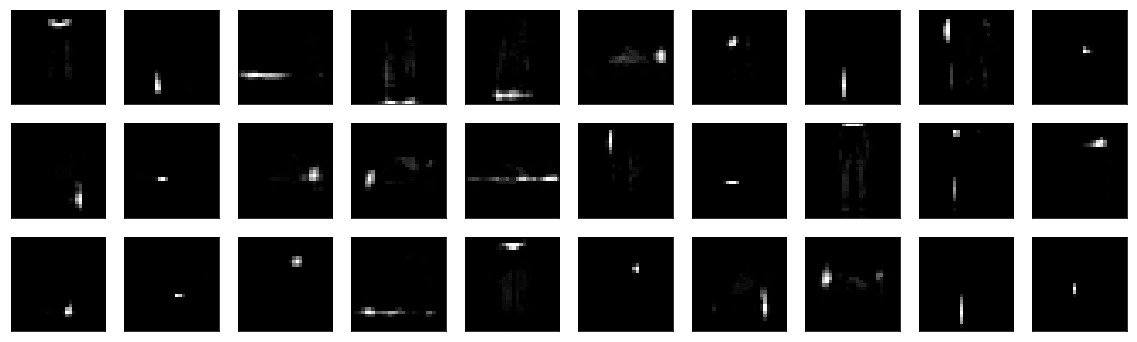

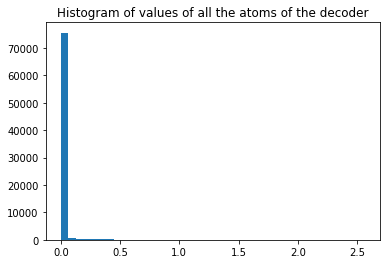

In [8]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
plot_histograms(h_test[idx_small])
bastien_utils.plot_all_images(atoms[:30])
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

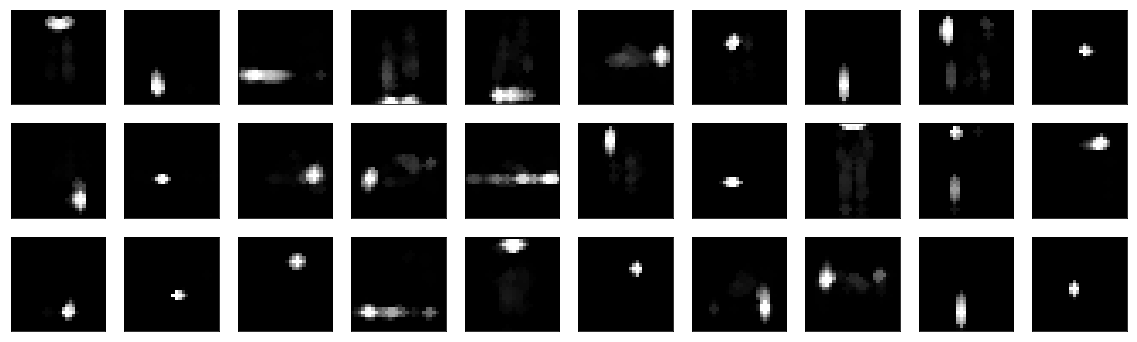

In [9]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
bastien_utils.plot_all_images(atoms_dil[:30])

In [10]:
print('Test reconstruction error: ', metrics.reconstruction_error(x_test, atoms, h_test))
print("Test sparsity Measure of the encoding (Hoyer): ", metrics.sparsity_Hoyer(h_test))
print('Test max-approximation error to dilatation (original): ', metrics.max_approximation_error(x_test, atoms, h_test, morphoMaths.dilatation, SE_scale=1)[0])
print('Test Max-approximation error to dilatation (reconstruction): ', metrics.max_approximation_error(x_test, atoms, h_test, morphoMaths.dilatation, SE_scale=1)[1])

Test reconstruction error:  0.05141151048128018
Test sparsity Measure of the encoding (Hoyer):  0.22032299763251623
Test max-approximation error to dilatation (original):  1.1232448039320557
Test Max-approximation error to dilatation (reconstruction):  0.7835567841864489


Dilatation of original images


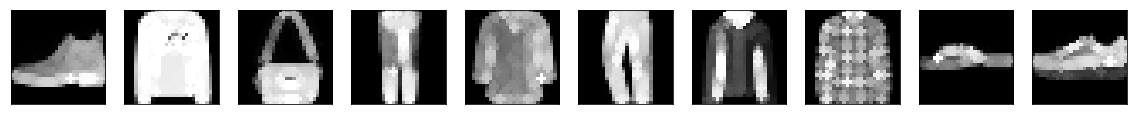

Dilatation of reconstructed images


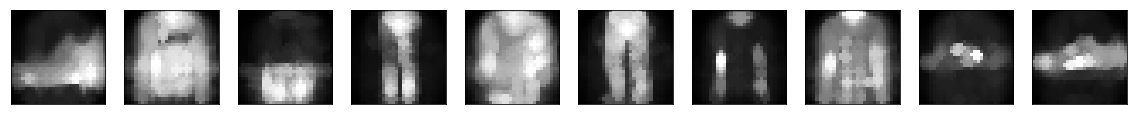

Max-approximation to dilatation


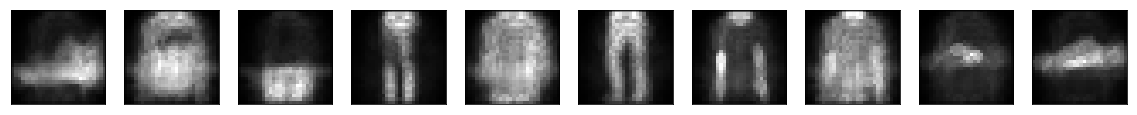

In [11]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
print('Max-approximation to dilatation')
bastien_utils.plot_all_images(metrics.reconstructions(atoms_dil, h_test[idx_small]))

In [12]:
del x_test, y_test
FILE_PATH = "../"
x_train, y_train = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=True, test=False, subsetTest=False)

In [13]:
h_train = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/h_train.mat")['h_train']
x_rec_train = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/x_rec_train.mat")['x_rec_train']
atoms = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/W.mat")['W']

In [14]:
x_rec_train = x_rec_train.reshape((60000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))

In [15]:
idx_small = np.arange(10)
idx_small[2]=18
idx_small[4]=19
idx_small[7]=16
idx_small[9]=23
x_rec_small = x_rec_train[idx_small]
x_small=x_train[idx_small]

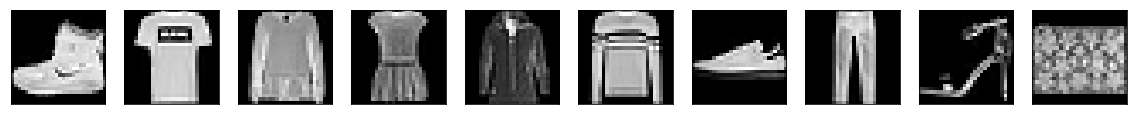

In [16]:
bastien_utils.plot_all_images(x_small)

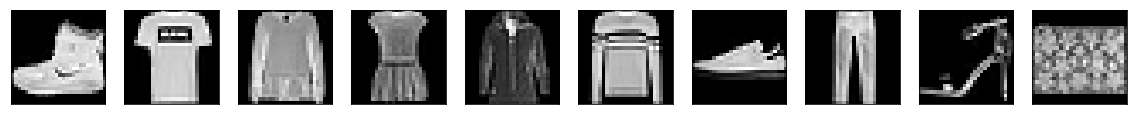

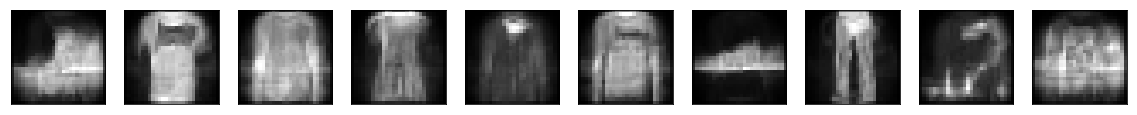

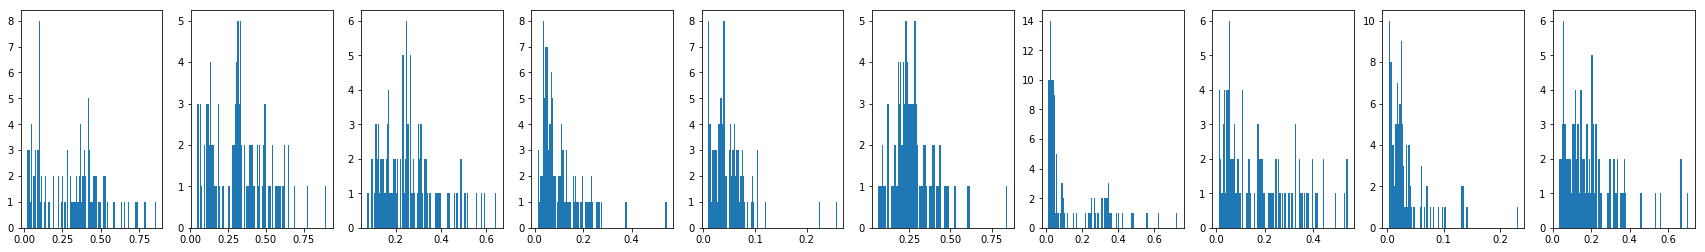

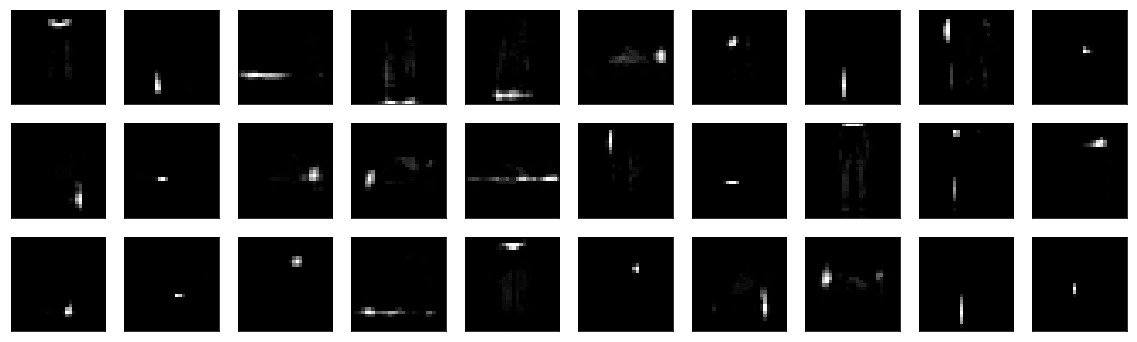

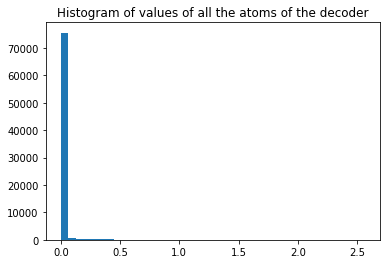

In [17]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
plot_histograms(h_train[idx_small])
bastien_utils.plot_all_images(atoms[:30])
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of original images


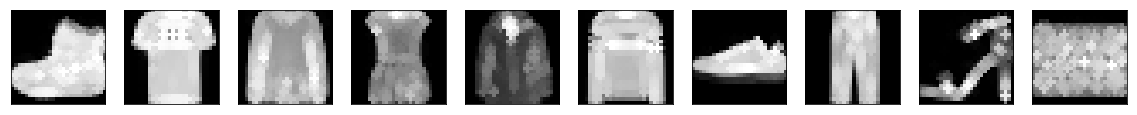

Dilatation of reconstructed images


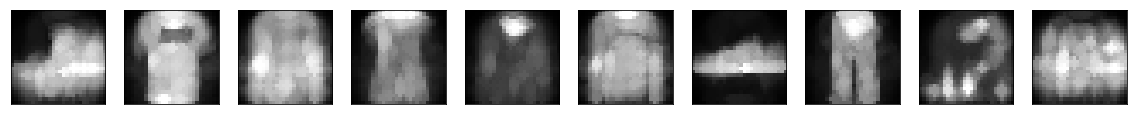

Max-approximation to dilatation


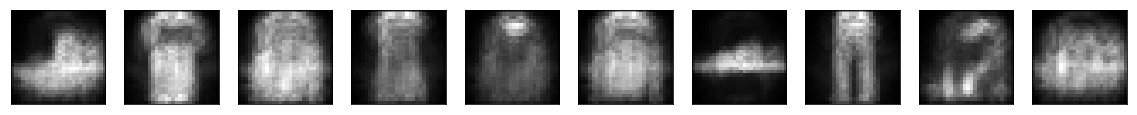

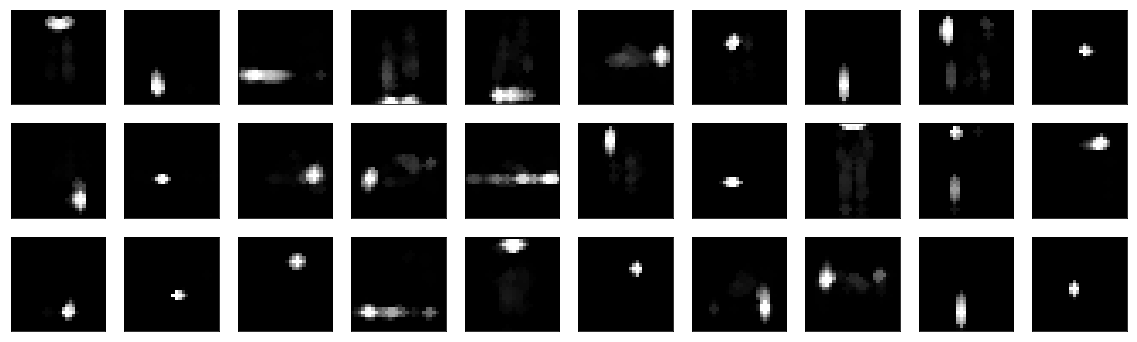

In [18]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
print('Max-approximation to dilatation')
bastien_utils.plot_all_images(metrics.reconstructions(atoms_dil, h_train[idx_small]))
bastien_utils.plot_all_images(atoms_dil[:30])

In [19]:
print('train reconstruction error: ', metrics.reconstruction_error(x_train, atoms, h_train))
print("train sparsity Measure of the encoding (Hoyer): ", metrics.sparsity_Hoyer(h_train))
print('train max-approximation error to dilatation (original): ', metrics.max_approximation_error(x_train, atoms, h_train, morphoMaths.dilatation, SE_scale=1)[0])
print('train Max-approximation error to dilatation (reconstruction): ', metrics.max_approximation_error(x_train, atoms, h_train, morphoMaths.dilatation, SE_scale=1)[1])

train reconstruction error:  0.05138200707165478
train sparsity Measure of the encoding (Hoyer):  0.22111380272706213
train max-approximation error to dilatation (original):  1.1247425726107918
train Max-approximation error to dilatation (reconstruction):  0.7843505021452586


## 2. With scaling

In the original paper, the data was first scaled 

In [20]:
del x_train, y_train
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=False, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2]=31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [21]:
h_test = io.loadmat("../Results/NNSAE/18_11_08_fashionMNIST_lrateR0_01_lrateIP_001_regR0_0002_with_scaling/with_scaling/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/NNSAE/18_11_08_fashionMNIST_lrateR0_01_lrateIP_001_regR0_0002_with_scaling/with_scaling/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/NNSAE/18_11_08_fashionMNIST_lrateR0_01_lrateIP_001_regR0_0002_with_scaling/with_scaling/W.mat")['W']

In [22]:
x_rec_test = x_rec_test.reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))

In [23]:
x_rec_small = x_rec_test[idx_small]

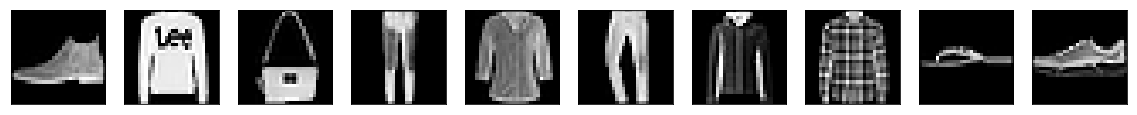

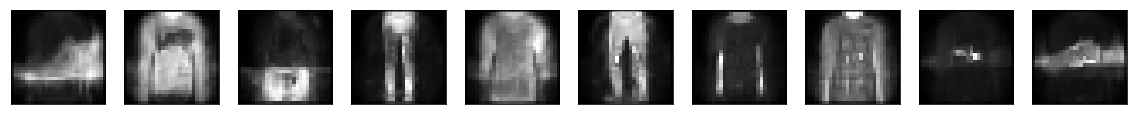

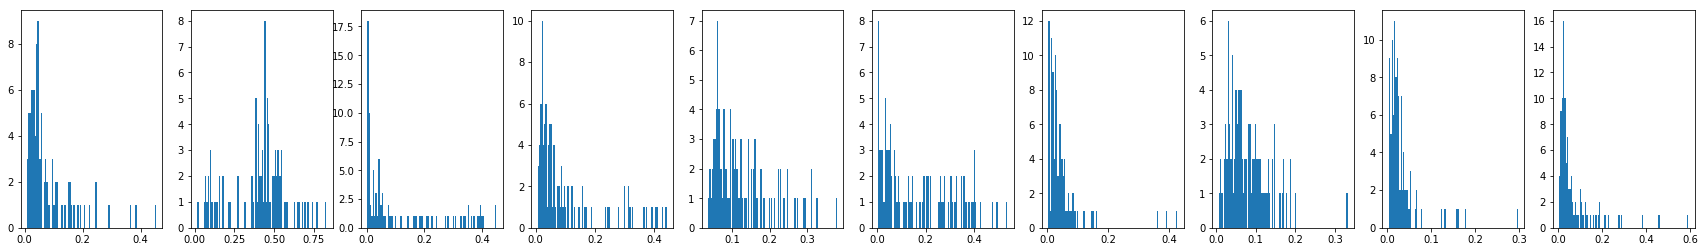

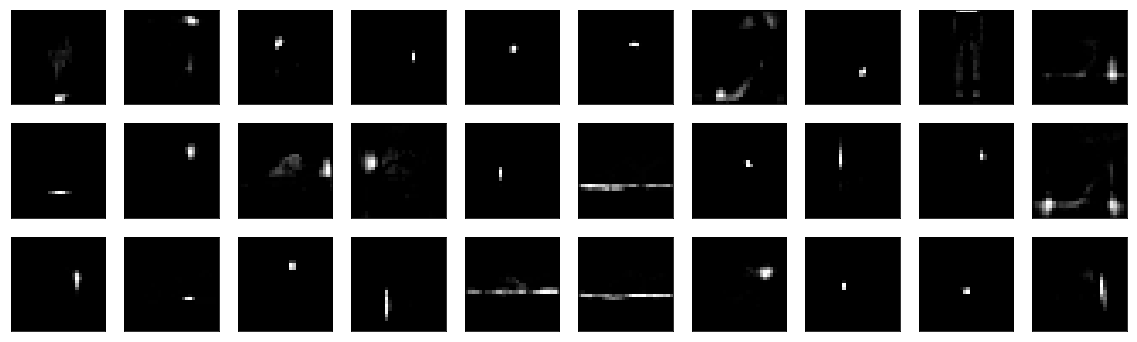

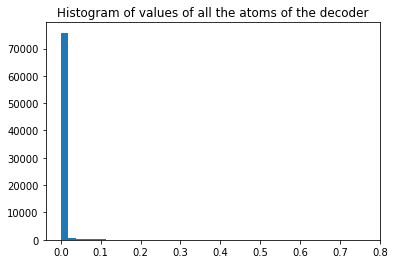

In [24]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
plot_histograms(h_test[idx_small])
bastien_utils.plot_all_images(atoms[:30])
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

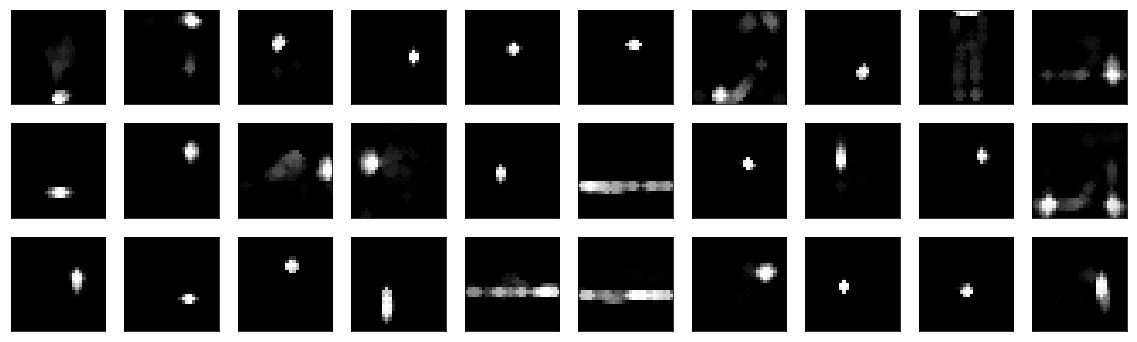

In [25]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
bastien_utils.plot_all_images(atoms_dil[:30])

In [26]:
print('Test reconstruction error: ', metrics.reconstruction_error(0.25*x_test, atoms, h_test))
print("Test sparsity Measure of the encoding (Hoyer): ", metrics.sparsity_Hoyer(h_test))
print('Test max-approximation error to dilatation (original): ', metrics.max_approximation_error(0.25*x_test, atoms, h_test, morphoMaths.dilatation, SE_scale=1)[0])
print('Test Max-approximation error to dilatation (reconstruction): ', metrics.max_approximation_error(0.25*x_test, atoms, h_test, morphoMaths.dilatation, SE_scale=1)[1])

Test reconstruction error:  0.0027409647672756473
Test sparsity Measure of the encoding (Hoyer):  0.2168475614018477
Test max-approximation error to dilatation (original):  0.06022968986851507
Test Max-approximation error to dilatation (reconstruction):  0.04370349143575755


Dilatation of original images


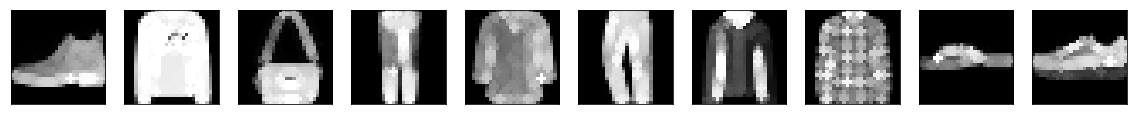

Dilatation of reconstructed images


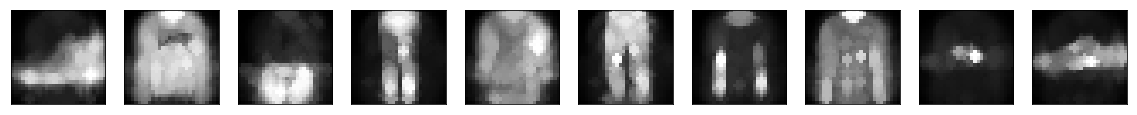

Max-approximation to dilatation


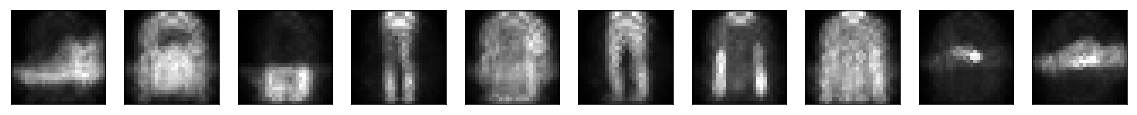

In [27]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, 0.25*x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
print('Max-approximation to dilatation')
bastien_utils.plot_all_images(metrics.reconstructions(atoms_dil, h_test[idx_small]))

In [28]:
del x_test, y_test
FILE_PATH = "../"
x_train, y_train = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=True, test=False, subsetTest=False)

In [29]:
h_train = io.loadmat("../Results/NNSAE/18_11_08_fashionMNIST_lrateR0_01_lrateIP_001_regR0_0002_with_scaling/with_scaling/h_train.mat")['h_train']
x_rec_train = io.loadmat("../Results/NNSAE/18_11_08_fashionMNIST_lrateR0_01_lrateIP_001_regR0_0002_with_scaling/with_scaling/x_rec_train.mat")['x_rec_train']
atoms = io.loadmat("../Results/NNSAE/18_11_08_fashionMNIST_lrateR0_01_lrateIP_001_regR0_0002_with_scaling/with_scaling/W.mat")['W']

In [30]:
x_rec_train = x_rec_train.reshape((60000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))

In [31]:
idx_small = np.arange(10)
idx_small[2]=18
idx_small[4]=19
idx_small[7]=16
idx_small[9]=23
x_rec_small = x_rec_train[idx_small]
x_small=x_train[idx_small]

In [32]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
plot_histograms(h_train[idx_small])
bastien_utils.plot_all_images(atoms[:30])
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

SyntaxError: invalid syntax (<ipython-input-32-b119a427d3bb>, line 7)

In [ ]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
print('Max-approximation to dilatation')
bastien_utils.plot_all_images(metrics.reconstructions(atoms_dil, h_train[idx_small]))
bastien_utils.plot_all_images(atoms_dil[:30])

In [ ]:
print('train reconstruction error: ', metrics.reconstruction_error(x_train, atoms, h_train))
print("train sparsity Measure of the encoding (Hoyer): ", metrics.sparsity_Hoyer(h_train))
print('train max-approximation error to dilatation (original): ', metrics.max_approximation_error(x_train, atoms, h_train, morphoMaths.dilatation, SE_scale=1)[0])
print('train Max-approximation error to dilatation (reconstruction): ', metrics.max_approximation_error(x_train, atoms, h_train, morphoMaths.dilatation, SE_scale=1)[1])